In [2]:
import numpy as np
from load import load_data_wrapper

training_data, validation_data, test_data = load_data_wrapper()
# data = training_data[i][0]
#labels = training_data[i][1]
num_train = 50000
num_test = 10000
num_val = 10000
X_train = []
y_train = []
for i in range(len(training_data)):
    X_train.append(training_data[i][0])
    y_train.append(training_data[i][1])
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = []
y_test = []
for i in range(len(test_data)):
    X_test.append(test_data[i][0])
    y_test.append(test_data[i][1])
X_test = np.array(X_test)
y_test = np.array(y_test)

X_val = []
y_val = []
for i in range(len(validation_data)):
    X_val.append(validation_data[i][0])
    y_val.append(validation_data[i][1])
X_val = np.array(X_val)
y_val = np.array(y_val)


In [3]:

def sigmoid (x):
    return 1/(1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
def loss(predicted_output,desired_output):
    return 1/2*(desired_output-predicted_output)**2


class NeuralNetwork() :
    def __init__ (self, inputLayerNeuronsNumber , hiddenLayerNeuronsNumber, outputLayerNeuronsNumber):
        self.inputLayerNeuronsNumber = inputLayerNeuronsNumber
        self.hiddenLayerNeuronsNumber = hiddenLayerNeuronsNumber
        self.outputLayerNeuronsNumber = outputLayerNeuronsNumber
        self.learning_rate = 0.1
        #He initialization
        self.hidden_weights = np.random.randn(hiddenLayerNeuronsNumber,inputLayerNeuronsNumber)*np.sqrt(2/inputLayerNeuronsNumber)
        self.hidden_bias = np.zeros([hiddenLayerNeuronsNumber,1])
        self.output_weights = np.random.randn(outputLayerNeuronsNumber,hiddenLayerNeuronsNumber)
        self.output_bias = np.zeros([outputLayerNeuronsNumber,1])
        self.loss = []
        
        
    def train(self, inputs, desired_output):
        
        hidden_layer_in = np.dot(self.hidden_weights, inputs) + self.hidden_bias
        hidden_layer_out = sigmoid(hidden_layer_in)
        
        output_layer_in = np.dot(self.output_weights, hidden_layer_out) + self.output_bias
        predicted_output = sigmoid(output_layer_in)
        
        error = desired_output - predicted_output
        d_predicted_output = error * sigmoid_derivative(predicted_output)
        
        error_hidden_layer = d_predicted_output.T.dot(self.output_weights)
        d_hidden_layer = error_hidden_layer.T * sigmoid_derivative(hidden_layer_out)
                
        self.output_weights += hidden_layer_out.dot(d_predicted_output.T).T * self.learning_rate
        self.output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * self.learning_rate
        
        self.hidden_weights += inputs.dot(d_hidden_layer.T).T * self.learning_rate
        self.hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * self.learning_rate
        self.loss.append(loss(predicted_output,desired_output))
        
        
    def predict(self, inputs):
        hidden_layer_in = np.dot(self.hidden_weights, inputs) + self.hidden_bias
        hidden_layer_out = sigmoid(hidden_layer_in)
        output_layer_in = np.dot(self.output_weights, hidden_layer_out) + self.output_bias
        predicted_output = sigmoid(output_layer_in)
        return predicted_output

nn=NeuralNetwork(784,350,10)

In [4]:
n_epochs = 15
losses = []
mini_batches = int(num_train/n_epochs)
for i in range(X_train.shape[0]):
    inputs = np.array(X_train[i, :].reshape(-1,1))
    desired_output = np.array(y_train[i, :].reshape(-1,1))
    nn.train(inputs, desired_output)
    if (i == 0):
        print("Epoch: 0, loss: {}".format(np.mean(nn.loss[0:mini_batches])))
        losses.append(np.mean(nn.loss[0:mini_batches]))
    if (i+1)%mini_batches == 0:
        print("Epoch: {}, loss: {}".format(int((i+1)/mini_batches),np.mean(nn.loss[i+1-mini_batches:i])))
        losses.append(np.mean(nn.loss[i+1-mini_batches:i]))
        # print(np.mean(nn.loss))
# batch_data = np.array_split(X_train, n_epochs)
# batch_data_labels = np.array_split(y_train, n_epochs)
# for (data_set, data_set_labels) in zip(batch_data, batch_data_labels):
#     inputs = np.array(data_set)
#     desired_output = np.array(data_set_labels)
#     nn.train(inputs, desired_output)
#     print("Epoch: {}, loss: {}".format(0, np.mean(nn.loss[-1])))



Epoch: 0, loss: 0.24971765642312044
Epoch: 1, loss: 0.03148753202649673
Epoch: 2, loss: 0.012813362294539896
Epoch: 3, loss: 0.009791281249295736
Epoch: 4, loss: 0.008322595430606157
Epoch: 5, loss: 0.007806232315434271
Epoch: 6, loss: 0.006194904411088159
Epoch: 7, loss: 0.006146408952266456
Epoch: 8, loss: 0.005669682138423099
Epoch: 9, loss: 0.005595711308031397
Epoch: 10, loss: 0.00572083440916794
Epoch: 11, loss: 0.0047419926374940935
Epoch: 12, loss: 0.00488323206951256
Epoch: 13, loss: 0.004816182760359606
Epoch: 14, loss: 0.0048658682086938155
Epoch: 15, loss: 0.004845817680505716


In [5]:
prediction_list = []
for i in range(X_test.shape[0]):
    inputs = np.array(X_test[i].reshape(-1,1))
    prediction_list.append(nn.predict(inputs))

correct_counter = 0
for i in range(len(prediction_list)):
    out_index = np.where(prediction_list[i] == np.amax(prediction_list[i]))[0][0]
    if y_test[i]==out_index:
        correct_counter+=1

accuracy = correct_counter/num_test

print("Test accuracy is : ",accuracy*100," %")

Test accuracy is :  95.55  %


In [6]:
val_prediction_list = []
for i in range(X_val.shape[0]):
    inputs = np.array(X_val[i].reshape(-1,1))
    val_prediction_list.append(nn.predict(inputs))

correct_counter = 0
for i in range(len(val_prediction_list)):
    out_index = np.where(val_prediction_list[i] == np.amax(val_prediction_list[i]))[0][0]
    if y_val[i]==out_index:
        correct_counter+=1
accuracy = correct_counter/num_val
print("Validation accuracy is : ",accuracy*100," %")


Validation accuracy is :  95.85000000000001  %


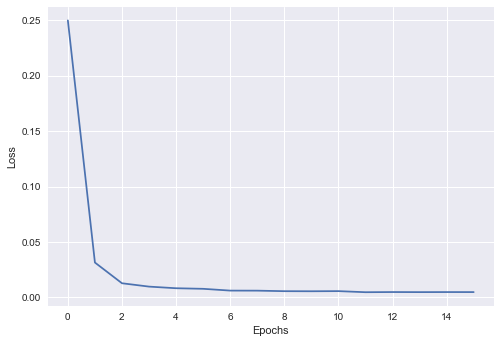

In [8]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.style.use('seaborn')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Prediction from network: 8, label: 5
Prediction from network: 5, label: 5
Prediction from network: 8, label: 8
Prediction from network: 9, label: 9
Prediction from network: 1, label: 1
Prediction from network: 9, label: 9
Prediction from network: 7, label: 7
Prediction from network: 2, label: 2
Prediction from network: 8, label: 8


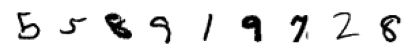

Accuracy from network: 88%


In [25]:
figure = plt.figure()

total_correct = 0
total_samples = 0
for i in range(1,10):
    index = np.random.randint(0,len(X_test))
    inputs = np.array(X_test[index].reshape(-1,1))
    prediction = np.argmax(nn.predict(inputs))
    label = y_test[index]
    plt.subplot(6, 10, i)
    plt.axis('off')
    plt.imshow(X_test[index].reshape(28,28), cmap='gray_r')
    print("Prediction from network: {}, label: {}".format(prediction , label))
    total_samples += 1
    if prediction == label:
        total_correct += 1
plt.show()
print("Accuracy from network: {}%".format(int(total_correct*100/total_samples)))